In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Analysis with median derived value.  Checking for jump between (blue to green) and (green to red) chips

### Method of persistence determination:
   - found median of last 100 points in chip 1
   - found median and std. dev. of first 100 points in chip 2
   - persist_val = ( median(chip1) - median(chip2) ) / std(chip2) 

#### Each line in file has format:

#### (starflag_indiv, starflag_comb, aspcapflag, targflag_1, targflag_2, SNR_visit, SNR_combined, ap_id, loc_id, fiber, (bluegreen)persist, (greenred)persist)
    

In [3]:
f = '/home/spiffical/data/stars/apStar_visits_quantifypersist_med.txt'
persist_vals_med1=[]
persist_vals_med2=[]
fibers_med = []
snr_combined_med = []
starflags_indiv_med = []
loc_ids_med = []
ap_ids_med = []
fi = open(f)
for j, line in enumerate(fi):
    
    # Get values
    line = line.split()
    persist1 = float(line[-2])
    persist2 = float(line[-1])
    fiber = int(line[-3])
    snr_comb = float(line[-6])
    starflag_indiv = float(line[0])
    loc_id = line[-4]
    ap_id = line[-5] 
    
    # Append to lists
    persist_vals_med1.append(persist1)
    persist_vals_med2.append(persist2)
    fibers_med.append(fiber)
    snr_combined_med.append(snr_comb)
    starflags_indiv_med.append(starflag_indiv)
    loc_ids_med.append(loc_id)
    ap_ids_med.append(ap_id)
fi.close()

## First let's examine the range of persistence values

In [6]:
# Get rid of nans and infs in (bluegreen) jump
nan_list2 = np.isnan(persist_vals_med1) 
inf_list2 = np.isinf(persist_vals_med1)

comb_list = np.invert([a or b for a,b in zip(nan_list2, inf_list2)]) # invert so we keep non-nans

persist_vals_med1 = np.asarray(persist_vals_med1)[comb_list]
fibers_med1 = np.asarray(fibers_med)[comb_list]
snr_combined_med1 = np.asarray(snr_combined_med)[comb_list]
starflags_indiv_med1 = np.asarray(starflags_indiv_med)[comb_list]
loc_ids_med1 = np.asarray(loc_ids_med)[comb_list]
ap_ids_med1 = np.asarray(ap_ids_med)[comb_list]

In [7]:
# Get rid of nans and infs in (greenred) jump
nan_list3 = np.isnan(persist_vals_med2) 
inf_list3 = np.isinf(persist_vals_med2)

comb_list2 = np.invert([a or b for a,b in zip(nan_list3, inf_list3)]) # invert so we keep non-nans

persist_vals_med2 = np.asarray(persist_vals_med2)[comb_list2]
fibers_med2 = np.asarray(fibers_med)[comb_list2]
snr_combined_med2 = np.asarray(snr_combined_med)[comb_list2]
starflags_indiv_med2 = np.asarray(starflags_indiv_med)[comb_list2]
loc_ids_med2 = np.asarray(loc_ids_med)[comb_list2]
ap_ids_med2 = np.asarray(ap_ids_med)[comb_list2]

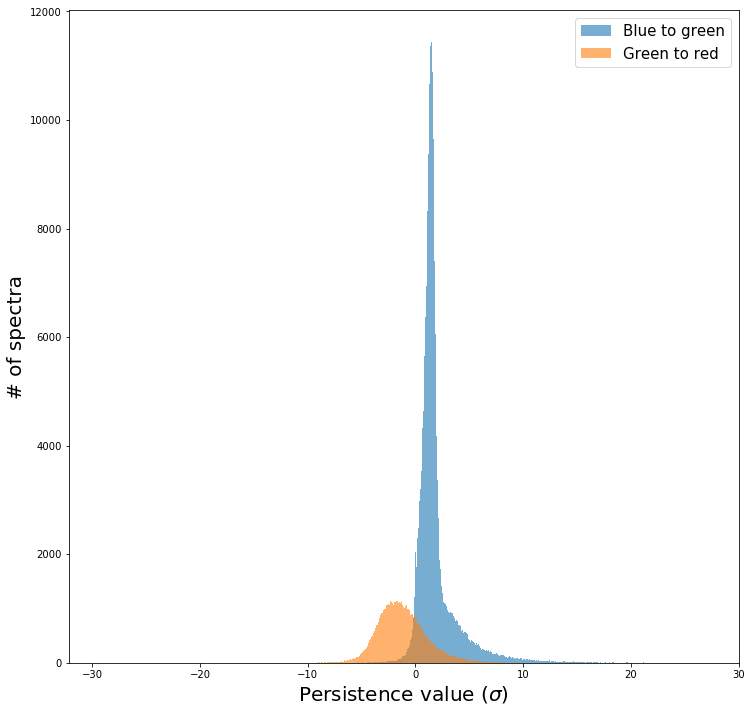

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(persist_vals_med1, bins=4000, alpha=0.6, label='Blue to green')
ax.hist(persist_vals_med2, bins=4000, alpha=0.6, label='Green to red' )
ax.set_xlim((min(persist_vals_med2), 30))
ax.set_xlabel(r'Persistence value ($\sigma$)', size=20)
ax.set_ylabel('# of spectra', size=20)
ax.legend(loc=0, prop={'size':15})
plt.show()

## Now let's see which fibers are being affected

In [9]:
# High (>3sigma) blue to green persistence
high_persist_med1_indx3 = np.abs(persist_vals_med1)>3
high_persist_med1_vals3 = persist_vals_med1[high_persist_med1_indx3]
high_persist_med_fibers3 = fibers_med[high_persist_med1_indx3]
high_persist_med_snr3 = snr_combined_med[high_persist_med1_indx3]
high_persist_med_starflag3 = starflags_indiv_med[high_persist_med1_indx3]
high_persist_med_ap3 = ap_ids_med[high_persist_med1_indx3]
high_persist_med_loc3 = loc_ids_med[high_persist_med1_indx3]

# Really high (>8sigma) blue to green persistence
high_persist_med1_indx8 = np.abs(persist_vals_med1)>8
high_persist_med1_vals8 = persist_vals_med1[high_persist_med1_indx8]
high_persist_med_fibers8 = fibers_med[high_persist_med1_indx8]
high_persist_med_snr8 = snr_combined_med[high_persist_med1_indx8]
high_persist_med_starflag8 = starflags_indiv_med[high_persist_med1_indx8]
high_persist_med_ap8 = ap_ids_med[high_persist_med1_indx8]
high_persist_med_loc8 = loc_ids_med[high_persist_med1_indx8]

In [10]:
# High (>3sigma) green to red persistence
high_persist_med2_indx3 = np.abs(persist_vals_med2)>3
high_persist_med2_vals3 = persist_vals_med2[high_persist_med2_indx3]
high_persist_med2_fibers3 = fibers_med2[high_persist_med2_indx3]
high_persist_med2_snr3 = snr_combined_med2[high_persist_med2_indx3]
high_persist_med2_starflag3 = starflags_indiv_med2[high_persist_med2_indx3]
high_persist_med2_ap3 = ap_ids_med2[high_persist_med2_indx3]
high_persist_med2_loc3 = loc_ids_med2[high_persist_med2_indx3]

# Really high (>8sigma) green to red persistence
high_persist_med2_indx8 = np.abs(persist_vals_med2)>8
high_persist_med2_vals8 = persist_vals_med2[high_persist_med2_indx8]
high_persist_med2_fibers8 = fibers_med2[high_persist_med2_indx8]
high_persist_med2_snr8 = snr_combined_med2[high_persist_med2_indx8]
high_persist_med2_starflag8 = starflags_indiv_med2[high_persist_med2_indx8]
high_persist_med2_ap8 = ap_ids_med2[high_persist_med2_indx8]
high_persist_med2_loc8 = loc_ids_med2[high_persist_med2_indx8]

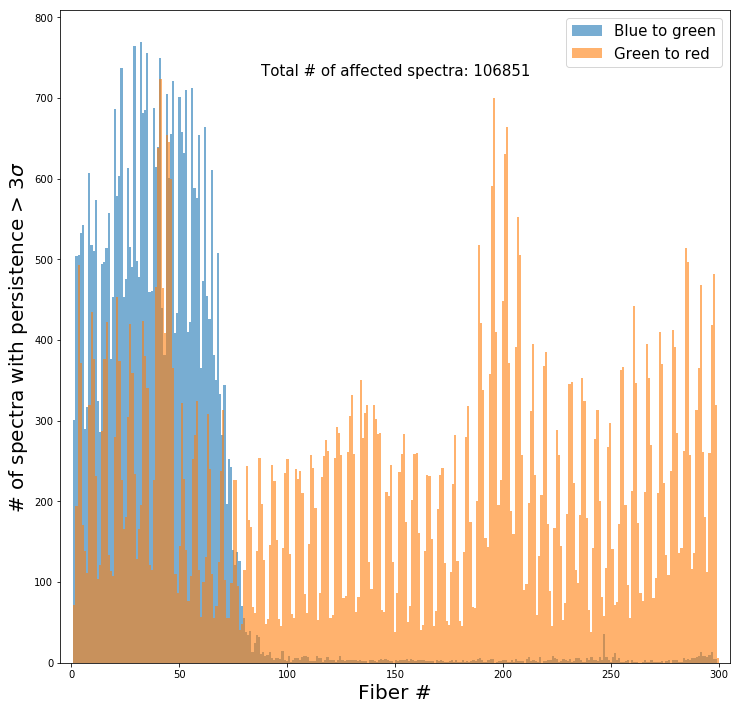

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(high_persist_med_fibers3, bins=300, alpha=0.6, label='Blue to green')
ax.hist(high_persist_med2_fibers3, bins=300, alpha=0.6, label='Green to red')
ax.set_xlabel('Fiber #', size=20)
ax.set_ylabel(r'# of spectra with persistence > 3$\sigma$', size=20)
ax.set_xlim((-5,305))
ax.annotate("Total # of affected spectra: "+str(len(high_persist_med2_fibers3) + len(high_persist_med_fibers3)), 
            xy=(0.3, 0.9), xycoords="axes fraction", size=15)
ax.legend(loc=0, prop={'size':15})
plt.show()

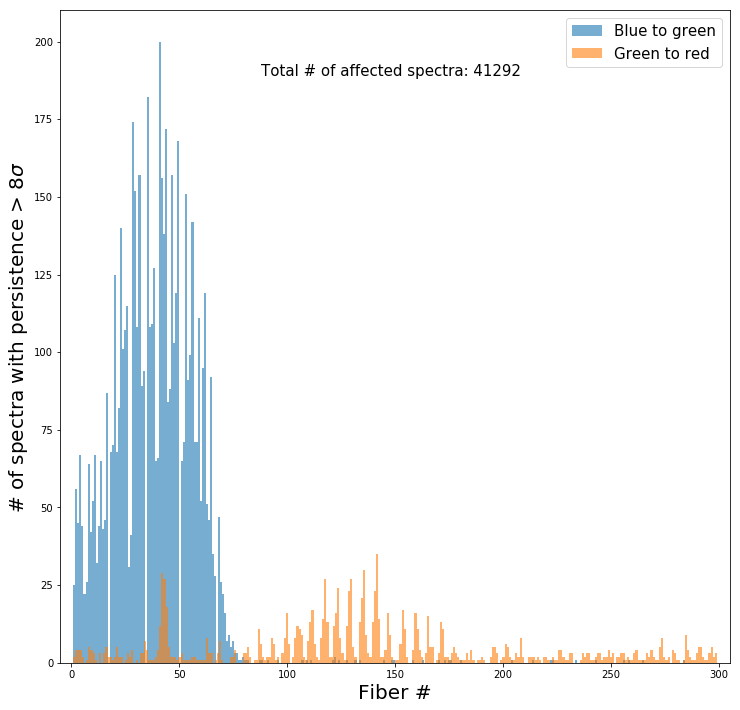

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
ax.hist(high_persist_med_fibers8, bins=300, alpha=0.6, label='Blue to green')
ax.hist(high_persist_med2_fibers8, bins=300, alpha=0.6, label='Green to red')
ax.set_xlabel('Fiber #', size=20)
ax.set_ylabel(r'# of spectra with persistence > 8$\sigma$', size=20)
ax.annotate("Total # of affected spectra: "+str(len(high_persist_med2_fibers8) + len(high_persist_med_fibers3)), 
            xy=(0.3, 0.9), xycoords="axes fraction", size=15)
ax.set_xlim((-5,305))
ax.legend(loc=0, prop={'size':15})
plt.show()

## Let's see if the persistence flags in apStar match the stars I've found

### STARFLAG with bit 9 corresponds to >20% of spectrum falling in high persistence region

#### ... persistence(bluegreen) > 3

In [14]:
bit=9
print '# with bit %s in apogee (from my database): %s' %(bit, len(high_persist_med_starflag3[high_persist_med_starflag3==2**bit]))
print 'total in my database: %s ' %len(high_persist_med_starflag3)
print 'fraction: ', len(high_persist_med_starflag3[high_persist_med_starflag3==2**bit])*1./len(high_persist_med_starflag3)

# with bit 9 in apogee (from my database): 32659
total in my database: 40070 
fraction:  0.815048664837


#### ... persistence(bluegreen) > 8

In [15]:
bit=9
print '# with bit %s in apogee (from my database): %s' %(bit, len(high_persist_med_starflag8[high_persist_med_starflag8==2**bit]))
print 'total in my database: %s ' %len(high_persist_med_starflag8)
print 'fraction: ', len(high_persist_med_starflag8[high_persist_med_starflag8==2**bit])*1./len(high_persist_med_starflag8)

# with bit 9 in apogee (from my database): 4103
total in my database: 6166 
fraction:  0.665423289004


#### ... persistence(greenred) > 3

In [16]:
bit=9
print '# with bit %s in apogee (from my database): %s' %(bit, len(high_persist_med2_starflag3[high_persist_med2_starflag3==2**bit]))
print 'total in my database: %s ' %len(high_persist_med2_starflag3)
print 'fraction: ', len(high_persist_med2_starflag3[high_persist_med2_starflag3==2**bit])*1./len(high_persist_med2_starflag3)

# with bit 9 in apogee (from my database): 17511
total in my database: 66781 
fraction:  0.262215300759


#### ... persistence(greenred) > 8

In [17]:
bit=9
print '# with bit %s in apogee (from my database): %s' %(bit, len(high_persist_med2_starflag8[high_persist_med2_starflag8==2**bit]))
print 'total in my database: %s ' %len(high_persist_med2_starflag8)
print 'fraction: ', len(high_persist_med2_starflag8[high_persist_med2_starflag8==2**bit])*1./len(high_persist_med2_starflag8)

# with bit 9 in apogee (from my database): 203
total in my database: 1222 
fraction:  0.16612111293
